In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV

In [13]:
def get_score(n_estimators, cv_folds = 3):
    """Return the average MAE (mean absolute error) over CV folds of random forest model

    Assumes data in form of X (features/predictors DataFrame), y (target data Series)

    Keyword argument:
    n_estimators -- the number of trees in the forest
    cv_folds --  cross-validation splitting strategy
        - None, to use the default 3-fold cross validation,
        - integer, to specify the number of folds in a (Stratified)KFold,
        - CV splitter,
        - An iterable yielding (train, test) splits as arrays of indices.()
    """
    
        # Preprocessing for numerical data
    numerical_transformer = SimpleImputer(strategy='constant')

    # Preprocessing for categorical data
    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])

    # Bundle preprocessing for numerical and categorical data
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numerical_transformer, numerical_cols),
            ('cat', categorical_transformer, categorical_cols)
        ])
    # Pipeline: 
    my_pipeline = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(n_estimators = n_estimators,
                                    random_state = 0))
    ])
    
    # Multiply by -1 since sklearn calculates a negative MAE
    scores = -1 * cross_val_score(my_pipeline, X, y,
                                  cv = cv_folds,
                                  scoring = 'neg_mean_absolute_error')
    return scores.mean()
    pass

In [30]:
# Import data
train_data = pd.read_csv('Data/train.csv')
test_data = pd.read_csv('Data/test.csv')

y = train_data['Survived'].copy()

X = train_data.drop('Survived', axis = 1).copy()

# Divide data into training and validation subsets
X_train_full, X_valid_full, y_train, y_valid = train_test_split(X, y, 
                                                                train_size=0.8, test_size=0.2,
                                                                random_state=0)

# Cardinality: number of unique values in a column
# Select categorical columns with relatively low cardinality (convenient but arbitrary)
categorical_cols = [cname for cname in X_train_full.columns 
                    if X_train_full[cname].nunique() < 15 
                    and X_train_full[cname].dtype == "object"]

# Select numerical columns
numerical_cols = [cname for cname in X_train_full.columns if X_train_full[cname].dtype in ['int64', 'float64']]

# Keep selected columns only
my_cols = categorical_cols + numerical_cols
X_train = X_train_full[my_cols].copy()
X_valid = X_valid_full[my_cols].copy()

In [31]:
# Preprocessing for numerical data
numerical_transformer = SimpleImputer(strategy='constant')

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])
# Pipeline: 
my_pipeline = Pipeline(steps = [
('preprocessor', preprocessor),
('model', RandomForestRegressor(n_estimators = n_estimators,
                                random_state = 0))
])

NameError: name 'n_estimators' is not defined

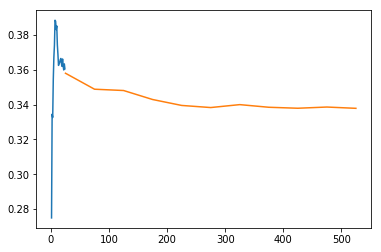

In [38]:
est_range = range(1,25)

results = {}
for i in est_range:
    results[i] = get_score(i)

%matplotlib inline

plt.plot(results.keys(), results.values())

est_range = np.arange(25,550,50)

results_2 = {}
for i in est_range:
    results_2[i] = get_score(i)

plt.plot(results_2.keys(), results_2.values())
plt.show()


In [ ]:
# param_grid = { 
#     'classifier__n_estimators': [200, 500],
#     'classifier__max_features': ['auto', 'sqrt', 'log2'],
#     'classifier__max_depth' : [4,5,6,7,8],
#     'classifier__criterion' :['gini', 'entropy']}
# from sklearn.model_selection import GridSearchCV
# CV = GridSearchCV(rf, param_grid, n_jobs= 1)
                  
# CV.fit(X_train, y_train)  
# print(CV.best_params_)   
# print(CV.best_score_)

Custom pipeline transformations:
https://towardsdatascience.com/custom-transformers-and-ml-data-pipelines-with-python-20ea2a7adb65

In [ ]:
## from: https://www.codementor.io/bruce3557/beautiful-machine-learning-pipeline-with-scikit-learn-uiqapbxuj
model_pipeline = Pipeline(steps=[
  ("features", FeatureUnion([
    ("numerical_features", 
     ColumnTransformer([
        ("numerical", 
         Pipeline(steps=[(
            "impute_stage", SimpleImputer(missing_values=np.nan, strategy="median",)
          )]), 
         ["feature_1"]
        )
     ])
    ), 
    ("categorical_features",
     ColumnTransformer([
        ("country_encoding",
         Pipeline(steps=[
            ("ohe", OneHotEncoder(handle_unknown="ignore")),
            ("reduction", NMF(n_components=8)),
         ]),
         ["country"],
        ),
      ])
    ), (
      "text_features",
      ColumnTransformer([
        (
          "title_vec",
          Pipeline(steps=[
            ("tfidf", TfidfVectorizer()),
            ("reduction", NMF(n_components=50)),
          ]),
          "title"
        )
      ])
    )
  ])),
  ("classifiers", RandomForestClassifier())
])

model_pipeline.fit(train_data, train_labels.values)
predictions = model_pipeline.predict(predict_data)